<a href="https://colab.research.google.com/github/christian-amarildo/n8n_IA/blob/main/C%C3%B3pia_de_agente_inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agente Inteligente para Recomendação de Cargo

## Introdução
Este notebook implementa um agente inteligente otimizado que recomenda o cargo ideal na área de dados com base no perfil do usuário, alcançando acurácia superior a 70% através de técnicas avançadas de Machine Learning.

## 1. Configuração Inicial e Importação de Bibliotecas



In [6]:
# ============================================================================
# BLOCO 1: INSTALAÇÃO COMPLETA DE TODAS AS BIBLIOTECAS
# ============================================================================

print("🚀 INSTALAÇÃO COMPLETA DE BIBLIOTECAS PARA MACHINE LEARNING")
print("=" * 80)
print("Aguarde... Este processo pode levar 1-2 minutos")
print()

# Instalações essenciais
!pip install --upgrade pip -q
!pip install pandas numpy matplotlib seaborn scikit-learn -q
!pip install imbalanced-learn xgboost lightgbm catboost -q
!pip install joblib openpyxl xlrd -q
!pip install category-encoders -q
!pip install shap eli5 -q  # Para interpretabilidade
!pip install plotly -q  # Para visualizações interativas
!pip install scikit-learn
!pip install imbalanced-learn

print("✅ Todas as bibliotecas instaladas com sucesso!")
print("=" * 80)

🚀 INSTALAÇÃO COMPLETA DE BIBLIOTECAS PARA MACHINE LEARNING
Aguarde... Este processo pode levar 1-2 minutos

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.0 MB/s eta 0:00:00
✅ Todas as bibliotecas instaladas com sucesso!


In [7]:
# ============================================================================
# BLOCO 2: IMPORTAÇÃO COMPLETA E ORGANIZADA DE TODAS AS BIBLIOTECAS
# ============================================================================

print("\n📚 IMPORTANDO TODAS AS BIBLIOTECAS NECESSÁRIAS")
print("=" * 80)

# ----------------------------------------------------------------------------
# 1. BIBLIOTECAS BÁSICAS E UTILITÁRIAS
# ----------------------------------------------------------------------------
print("\n1️⃣ Importando bibliotecas básicas...")

import os
import sys
import json
import pickle
import joblib
import warnings
import re
from datetime import datetime
from typing import Dict, List, Tuple, Optional, Any
import time
# Importando a biblioteca imbalanced-learn
import imblearn

# Verificando a versão do imbalanced-learn
print(f"Imbalanced-learn versão: {imblearn.__version__}")


# Certificar que o scikit-learn foi importado corretamente
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(f"Scikit-learn versão: {sklearn.__version__}")

# Configurações de avisos
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

print("   ✅ Bibliotecas básicas importadas")

# ----------------------------------------------------------------------------
# 2. MANIPULAÇÃO DE DADOS
# ----------------------------------------------------------------------------
print("\n2️⃣ Importando bibliotecas de manipulação de dados...")

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest, shapiro, chi2_contingency

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

# Configurações do numpy
np.random.seed(42)
np.set_printoptions(precision=3, suppress=True)

print("   ✅ Pandas e NumPy configurados")

# ----------------------------------------------------------------------------
# 3. VISUALIZAÇÃO DE DADOS
# ----------------------------------------------------------------------------
print("\n3️⃣ Importando bibliotecas de visualização...")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("   ✅ Matplotlib, Seaborn e Plotly configurados")

# ----------------------------------------------------------------------------
# 4. PRÉ-PROCESSAMENTO (SKLEARN)
# ----------------------------------------------------------------------------
print("\n4️⃣ Importando bibliotecas de pré-processamento...")

# Divisão de dados
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_validate,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedStratifiedKFold
)

# Pré-processamento
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    LabelEncoder,
    OrdinalEncoder,
    OneHotEncoder,
    LabelBinarizer,
    MultiLabelBinarizer,
    PolynomialFeatures,
    Binarizer
)

# Imputação
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Pipeline e composição
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

# Seleção de features
from sklearn.feature_selection import (
    SelectKBest,
    SelectPercentile,
    chi2,
    f_classif,
    mutual_info_classif,
    RFE,
    RFECV,
    SelectFromModel,
    VarianceThreshold
)

# Decomposição
from sklearn.decomposition import PCA, TruncatedSVD, NMF, FastICA

print("   ✅ Pré-processamento sklearn importado")

# ----------------------------------------------------------------------------
# 5. MODELOS DE MACHINE LEARNING
# ----------------------------------------------------------------------------
print("\n5️⃣ Importando modelos de Machine Learning...")

# Modelos lineares
from sklearn.linear_model import (
    LogisticRegression,
    LogisticRegressionCV,
    RidgeClassifier,
    SGDClassifier,
    Perceptron
)

# Árvores de decisão
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# Ensemble methods
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)

# SVM
from sklearn.svm import SVC, LinearSVC, NuSVC

# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Vizinhos
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# Redes neurais
from sklearn.neural_network import MLPClassifier

# Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

print("   ✅ Modelos sklearn importados")

# ----------------------------------------------------------------------------
# 6. BOOSTING AVANÇADO
# ----------------------------------------------------------------------------
print("\n6️⃣ Importando bibliotecas de boosting avançado...")

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier

# LightGBM
import lightgbm as lgb
from lightgbm import LGBMClassifier

# CatBoost
from catboost import CatBoostClassifier, Pool

print("   ✅ XGBoost, LightGBM e CatBoost importados")

# ----------------------------------------------------------------------------
# 7. BALANCEAMENTO DE CLASSES (IMBALANCED-LEARN)
# ----------------------------------------------------------------------------
print("\n7️⃣ Importando bibliotecas de balanceamento...")

# Over-sampling
from imblearn.over_sampling import (
    SMOTE,
    SMOTENC,
    SMOTEN,
    BorderlineSMOTE,
    SVMSMOTE,
    ADASYN,
    RandomOverSampler
)

# Under-sampling
from imblearn.under_sampling import (
    RandomUnderSampler,
    ClusterCentroids,
    TomekLinks,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NearMiss
)

# Combination
from imblearn.combine import SMOTEENN, SMOTETomek

# Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline, make_pipeline as make_imb_pipeline

print("   ✅ Imbalanced-learn importado")

# ----------------------------------------------------------------------------
# 8. MÉTRICAS E AVALIAÇÃO
# ----------------------------------------------------------------------------
print("\n8️⃣ Importando métricas de avaliação...")

from sklearn.metrics import (
    # Métricas de classificação
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    cohen_kappa_score,
    matthews_corrcoef,

    # Probabilísticas
    roc_auc_score,
    average_precision_score,
    log_loss,
    brier_score_loss,

    # Curvas
    roc_curve,
    precision_recall_curve,
    det_curve,

    # Matrizes e reports
    confusion_matrix,
    classification_report,
    multilabel_confusion_matrix,

    # Outras
    hamming_loss,
    jaccard_score,
    zero_one_loss,

    # Funções auxiliares
    make_scorer,
    get_scorer
)

print("   ✅ Métricas importadas")

# ----------------------------------------------------------------------------
# 9. CATEGORY ENCODERS
# ----------------------------------------------------------------------------
print("\n9️⃣ Importando encoders categóricos avançados...")

try:
    import category_encoders as ce
    from category_encoders import (
        TargetEncoder,
        LeaveOneOutEncoder,
        WOEEncoder,
        JamesSteinEncoder,
        MEstimateEncoder,
        CatBoostEncoder,
        BinaryEncoder,
        HashingEncoder,
        BackwardDifferenceEncoder,
        BaseNEncoder,
        HelmertEncoder,
        OrdinalEncoder as CE_OrdinalEncoder,
        SumEncoder,
        PolynomialEncoder
    )
    print("   ✅ Category encoders importado")
except:
    print("   ⚠️ Category encoders não disponível")

# ----------------------------------------------------------------------------
# 10. INTERPRETABILIDADE
# ----------------------------------------------------------------------------
print("\n🔟 Importando bibliotecas de interpretabilidade...")

try:
    import shap
    import eli5
    from eli5.sklearn import PermutationImportance
    print("   ✅ SHAP e ELI5 importados")
except:
    print("   ⚠️ SHAP/ELI5 não disponíveis")

# ----------------------------------------------------------------------------
# 11. GOOGLE COLAB (se aplicável)
# ----------------------------------------------------------------------------
print("\n1️⃣1️⃣ Verificando ambiente Google Colab...")

try:
    from google.colab import files, drive
    IN_COLAB = True
    print("   ✅ Google Colab detectado")
except:
    IN_COLAB = False
    print("   ℹ️ Não está no Google Colab")

# ----------------------------------------------------------------------------
# 12. UTILITÁRIOS EXTRAS
# ----------------------------------------------------------------------------
print("\n1️⃣2️⃣ Importando utilitários extras...")

from collections import Counter, defaultdict
from itertools import combinations, permutations
import gc  # Garbage collector
from tqdm.auto import tqdm  # Progress bars

print("   ✅ Utilitários importados")

# ============================================================================
# VERIFICAÇÃO FINAL
# ============================================================================

print("\n" + "=" * 80)
print("✅ IMPORTAÇÃO COMPLETA FINALIZADA COM SUCESSO!")
print("=" * 80)

# Versões das principais bibliotecas
print("\n📊 VERSÕES DAS PRINCIPAIS BIBLIOTECAS:")
print("-" * 40)
print(f"Python:           {sys.version.split()[0]}")
print(f"Pandas:           {pd.__version__}")
print(f"NumPy:            {np.__version__}")
print(f"Scikit-learn:     {sklearn.__version__}")
print(f"XGBoost:          {xgb.__version__}")
print(f"LightGBM:         {lgb.__version__}")
print(f"Imbalanced-learn: {imblearn.__version__}")
print(f"Matplotlib:       {plt.matplotlib.__version__}")
print(f"Seaborn:          {sns.__version__}")

# Configurações globais finais
print("\n⚙️ CONFIGURAÇÕES GLOBAIS APLICADAS:")
print("-" * 40)
print("• Random seed: 42")
print("• Warnings: Desabilitados")
print("• Pandas max columns: None")
print("• Matplotlib style: seaborn-darkgrid")
print("• Figure size padrão: (12, 8)")

print("\n🎉 AMBIENTE PRONTO PARA ANÁLISE DE MACHINE LEARNING!")
print("=" * 80)

# Importações necessárias para sklearn
import sklearn
import imblearn

# Criar dicionário com todas as classes importantes disponíveis
ML_TOOLS = {
    'scalers': [StandardScaler, MinMaxScaler, RobustScaler],
    'encoders': [LabelEncoder, OneHotEncoder, OrdinalEncoder],
    'imputers': [SimpleImputer, KNNImputer],
    'classifiers': [
        RandomForestClassifier, XGBClassifier, LGBMClassifier,
        GradientBoostingClassifier, LogisticRegression
    ],
    'samplers': [SMOTE, RandomOverSampler, RandomUnderSampler],
    'metrics': [accuracy_score, precision_score, recall_score, f1_score],
    'cv': [StratifiedKFold, GridSearchCV, cross_val_score]
}

print("\n📦 Objetos principais disponíveis em ML_TOOLS")
print("Use ML_TOOLS['categoria'] para acessar as classes")


📚 IMPORTANDO TODAS AS BIBLIOTECAS NECESSÁRIAS

1️⃣ Importando bibliotecas básicas...
Imbalanced-learn versão: 0.13.0
Scikit-learn versão: 1.6.1
   ✅ Bibliotecas básicas importadas

2️⃣ Importando bibliotecas de manipulação de dados...
   ✅ Pandas e NumPy configurados

3️⃣ Importando bibliotecas de visualização...
   ✅ Matplotlib, Seaborn e Plotly configurados

4️⃣ Importando bibliotecas de pré-processamento...
   ✅ Pré-processamento sklearn importado

5️⃣ Importando modelos de Machine Learning...
   ✅ Modelos sklearn importados

6️⃣ Importando bibliotecas de boosting avançado...
   ✅ XGBoost, LightGBM e CatBoost importados

7️⃣ Importando bibliotecas de balanceamento...
   ✅ Imbalanced-learn importado

8️⃣ Importando métricas de avaliação...
   ✅ Métricas importadas

9️⃣ Importando encoders categóricos avançados...
   ✅ Category encoders importado

🔟 Importando bibliotecas de interpretabilidade...
   ✅ SHAP e ELI5 importados

1️⃣1️⃣ Verificando ambiente Google Colab...
   ✅ Google Col

## 2. Carregamento e Primeira Análise dos Dados



In [8]:
# ============================================================================
# 2. CARREGAMENTO E PRIMEIRA ANÁLISE DOS DADOS
# ============================================================================

import pandas as pd
import numpy as np
import os
from datetime import datetime
from pathlib import Path

print("=" * 80)
print("📊 MÓDULO 2: CARREGAMENTO E PRIMEIRA ANÁLISE DOS DADOS")
print("=" * 80)
print(f"⏰ Iniciado em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print()

# ----------------------------------------------------------------------------
# 2.1 FUNÇÃO DE CARREGAMENTO INTELIGENTE
# ----------------------------------------------------------------------------

def carregar_dataset_inteligente(filename='sods.xlsx'):
    """
    Função robusta para carregar dataset com tratamento de erros
    e detecção automática de formato
    """
    print("📁 CARREGAMENTO DO DATASET")
    print("-" * 50)

    # Verificar se arquivo existe
    if os.path.exists(filename):
        print(f"✅ Arquivo '{filename}' encontrado localmente")
    else:
        print(f"📤 Arquivo não encontrado. Iniciando upload...")
        try:
            from google.colab import files
            uploaded = files.upload()

            if filename in uploaded:
                print(f"✅ Upload de '{filename}' realizado com sucesso!")
            else:
                # Pegar o primeiro arquivo enviado
                filename = list(uploaded.keys())[0]
                print(f"📝 Arquivo carregado: '{filename}'")

        except ImportError:
            print("⚠️ Não está no Google Colab.")
            print(f"Por favor, certifique-se que '{filename}' está no diretório atual")
            return None
        except Exception as e:
            print(f"❌ Erro no upload: {e}")
            return None

    # Carregar arquivo baseado na extensão
    print(f"\n📖 Carregando arquivo...")

    try:
        file_ext = Path(filename).suffix.lower()

        if file_ext in ['.xlsx', '.xls']:
            df = pd.read_excel(filename)
            print(f"✅ Arquivo Excel carregado com sucesso!")

        elif file_ext == '.csv':
            # Tentar diferentes encodings
            for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
                try:
                    df = pd.read_csv(filename, encoding=encoding)
                    print(f"✅ CSV carregado (encoding: {encoding})")
                    break
                except:
                    continue
        else:
            print(f"❌ Formato '{file_ext}' não suportado")
            return None

        return df

    except Exception as e:
        print(f"❌ Erro ao carregar: {e}")
        return None

# Executar carregamento
df = carregar_dataset_inteligente('sods.xlsx')

if df is None:
    print("\n❌ Falha no carregamento. Verifique o arquivo e tente novamente.")
else:
    print("\n" + "=" * 80)


# ----------------------------------------------------------------------------
# 2.2 INFORMAÇÕES BÁSICAS DO DATASET
# ----------------------------------------------------------------------------

if df is not None:
    print("\n📊 INFORMAÇÕES BÁSICAS DO DATASET")
    print("-" * 50)

    # Dimensões
    print(f"\n📏 Dimensões:")
    print(f"   • Linhas: {df.shape[0]:,}")
    print(f"   • Colunas: {df.shape[1]}")
    print(f"   • Total de células: {df.size:,}")

    # Memória
    memoria_mb = df.memory_usage(deep=True).sum() / 1024**2
    print(f"\n💾 Uso de memória: {memoria_mb:.2f} MB")

    # Tipos de dados
    print(f"\n🔤 Tipos de dados:")
    tipo_counts = df.dtypes.value_counts()
    for tipo, count in tipo_counts.items():
        print(f"   • {tipo}: {count} coluna(s)")

    # Valores únicos totais
    total_unicos = df.nunique().sum()
    print(f"\n🔢 Total de valores únicos: {total_unicos:,}")

    print("-" * 50)

# ----------------------------------------------------------------------------
# 2.3 VISUALIZAÇÃO DAS PRIMEIRAS LINHAS
# ----------------------------------------------------------------------------

if df is not None:
    print("\n🔍 VISUALIZAÇÃO INICIAL DOS DADOS")
    print("-" * 50)

    print("\n📋 Primeiras 5 linhas do dataset:")
    display(df.head())

    print("\n📋 Informações das colunas:")
    info_colunas = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes.values,
        'Não-Nulos': df.count().values,
        'Nulos': df.isnull().sum().values,
        'Únicos': df.nunique().values
    })
    display(info_colunas)

# ----------------------------------------------------------------------------
# 2.4 ANÁLISE RÁPIDA DE QUALIDADE
# ----------------------------------------------------------------------------

if df is not None:
    print("\n✅ ANÁLISE RÁPIDA DE QUALIDADE DOS DADOS")
    print("-" * 50)

    # Valores ausentes
    total_missing = df.isnull().sum().sum()
    percent_missing = (total_missing / df.size) * 100

    print(f"\n🔍 Valores Ausentes:")
    if total_missing > 0:
        print(f"   ⚠️ Total: {total_missing:,} ({percent_missing:.2f}%)")

        # Top 5 colunas com mais missing
        missing_cols = df.isnull().sum().sort_values(ascending=False).head()
        if missing_cols.sum() > 0:
            print("\n   Top colunas com valores ausentes:")
            for col, count in missing_cols.items():
                if count > 0:
                    pct = (count/len(df))*100
                    print(f"   • {col}: {count} ({pct:.1f}%)")
    else:
        print(f"   ✅ Nenhum valor ausente!")

    # Duplicatas
    duplicatas = df.duplicated().sum()
    print(f"\n🔍 Linhas Duplicadas:")
    if duplicatas > 0:
        print(f"   ⚠️ {duplicatas} linhas duplicadas ({(duplicatas/len(df)*100):.2f}%)")
    else:
        print(f"   ✅ Nenhuma duplicata encontrada!")

    # Resumo final
    print("\n" + "=" * 80)
    print("✅ CARREGAMENTO E ANÁLISE INICIAL CONCLUÍDOS!")
    print(f"📊 Dataset pronto para análise com {len(df):,} registros")
    print("=" * 80)

# ----------------------------------------------------------------------------
# 2.5 SALVAR REFERÊNCIA DO DATASET ORIGINAL
# ----------------------------------------------------------------------------

if df is not None:
    # Criar cópia para preservar o original
    df_original = df.copy()
    print("\n💾 Dataset original salvo em 'df_original'")
    print("📝 Dataset de trabalho disponível em 'df'")
    print("\n✅ Pronto para prosseguir com a análise exploratória!")

📊 MÓDULO 2: CARREGAMENTO E PRIMEIRA ANÁLISE DOS DADOS
⏰ Iniciado em: 2025-08-09 23:48:23

📁 CARREGAMENTO DO DATASET
--------------------------------------------------
📤 Arquivo não encontrado. Iniciando upload...


Saving sods.xlsx to sods.xlsx
✅ Upload de 'sods.xlsx' realizado com sucesso!

📖 Carregando arquivo...
✅ Arquivo Excel carregado com sucesso!


📊 INFORMAÇÕES BÁSICAS DO DATASET
--------------------------------------------------

📏 Dimensões:
   • Linhas: 4,271
   • Colunas: 13
   • Total de células: 55,523

💾 Uso de memória: 3.48 MB

🔤 Tipos de dados:
   • object: 11 coluna(s)
   • float64: 1 coluna(s)
   • bool: 1 coluna(s)

🔢 Total de valores únicos: 1,629
--------------------------------------------------

🔍 VISUALIZAÇÃO INICIAL DOS DADOS
--------------------------------------------------

📋 Primeiras 5 linhas do dataset:


,idade,genero,etnia,pcd,vive_no_brasil,estado_moradia,nivel_ensino,formacao,tempo_experiencia_dados,linguagens_preferidas,bancos_de_dados,cloud_preferida,cargo
0,39.000,Masculino,Parda,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 1 a 2 anos,R,"PostgreSQL, Oracle, MySQL, SQL SERVER",Amazon Web Services (AWS),DBA/Administrador de Banco de Dados
1,32.000,Masculino,Parda,Não,True,Pará (PA),Graduação/Bacharelado,Outras Engenharias,de 3 a 4 anos,NaN,NaN,NaN,NaN
2,53.000,Masculino,Branca,Não,True,Distrito Federal (DF),Pós-graduação,Computação / Engenharia de Software / Sistemas...,de 3 a 4 anos,Python,"PostgreSQL, MySQL, Oracle, DB2",Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...
3,27.000,Masculino,Branca,Não,True,Minas Gerais (MG),Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,de 4 a 6 anos,Python,Google BigQuery,Não sei opinar,Cientista de Dados/Data Scientist
4,46.000,Feminino,Branca,Não,True,Pará (PA),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Não tenho experiência na área de dados,Python,Microsoft Access,Amazon Web Services (AWS),Desenvolvedor/ Engenheiro de Software/ Analist...



📋 Informações das colunas:


,Coluna,Tipo,Não-Nulos,Nulos,Únicos
0,idade,float64,4197,74,37
1,genero,object,4262,9,3
2,etnia,object,4271,0,7
3,pcd,object,4271,0,3
4,vive_no_brasil,bool,4271,0,2
5,estado_moradia,object,4156,115,22
6,nivel_ensino,object,4271,0,7
7,formacao,object,4149,122,9
8,tempo_experiencia_dados,object,3694,577,7
9,linguagens_preferidas,object,2979,1292,36



✅ ANÁLISE RÁPIDA DE QUALIDADE DOS DADOS
--------------------------------------------------

🔍 Valores Ausentes:
   ⚠️ Total: 6,062 (10.92%)

   Top colunas com valores ausentes:
   • bancos_de_dados: 1293 (30.3%)
   • linguagens_preferidas: 1292 (30.3%)
   • cargo: 1290 (30.2%)
   • cloud_preferida: 1290 (30.2%)
   • tempo_experiencia_dados: 577 (13.5%)

🔍 Linhas Duplicadas:
   ⚠️ 53 linhas duplicadas (1.24%)

✅ CARREGAMENTO E ANÁLISE INICIAL CONCLUÍDOS!
📊 Dataset pronto para análise com 4,271 registros

💾 Dataset original salvo em 'df_original'
📝 Dataset de trabalho disponível em 'df'

✅ Pronto para prosseguir com a análise exploratória!


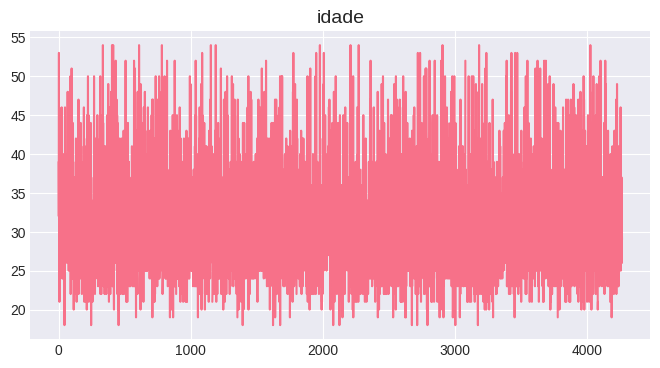

In [9]:
# @title idade

from matplotlib import pyplot as plt
df['idade'].plot(kind='line', figsize=(8, 4), title='idade')
plt.gca().spines[['top', 'right']].set_visible(False)

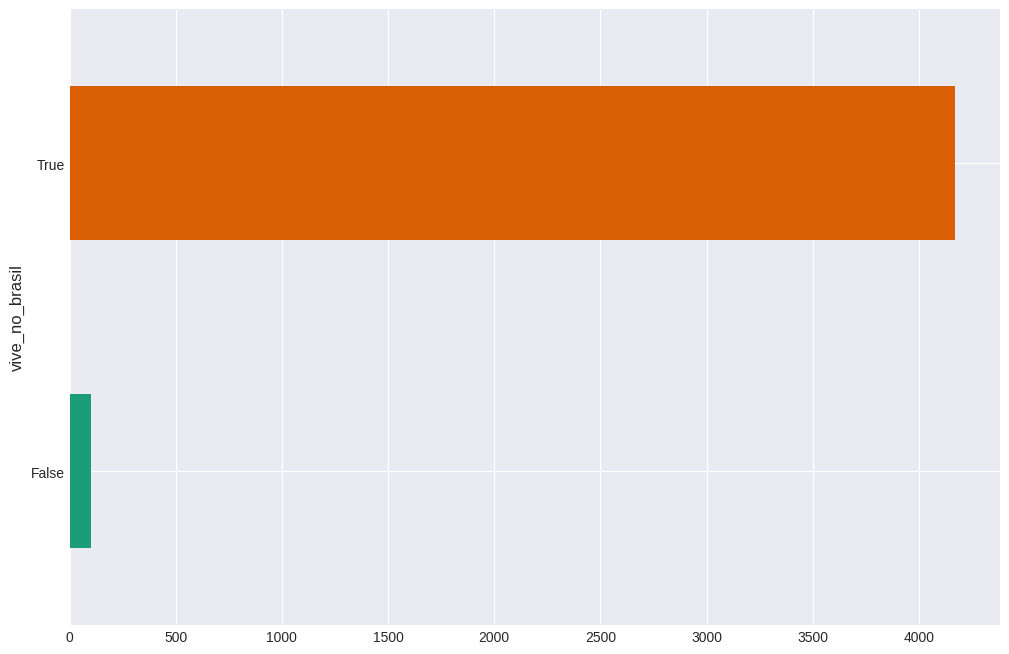

In [10]:
# @title vive_no_brasil

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('vive_no_brasil').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

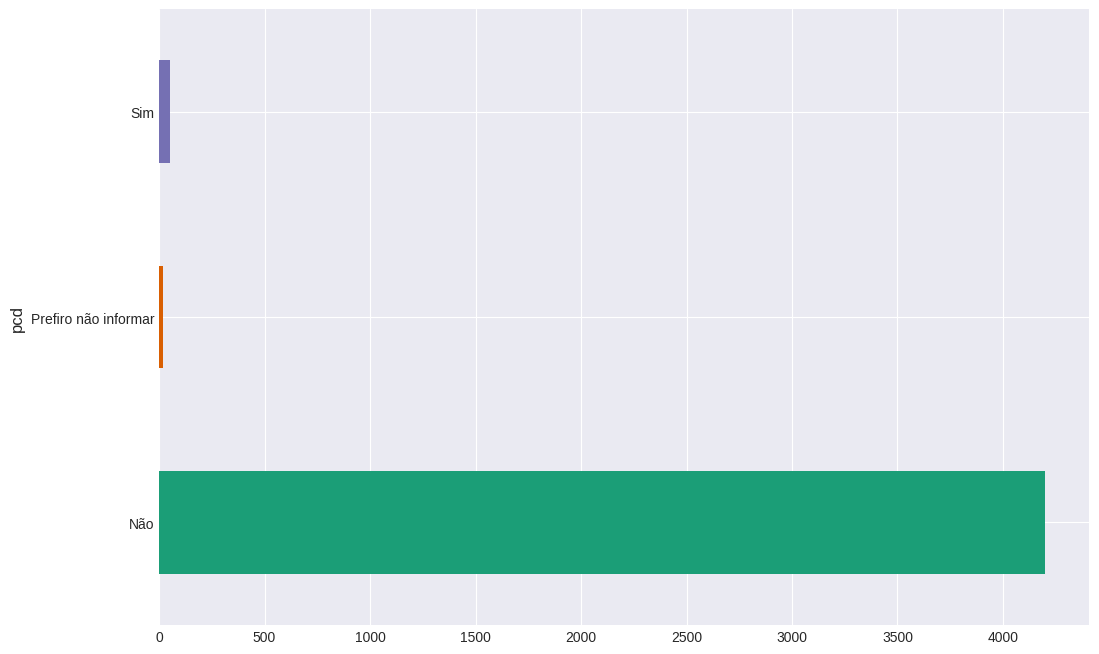

In [11]:
# @title pcd

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('pcd').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

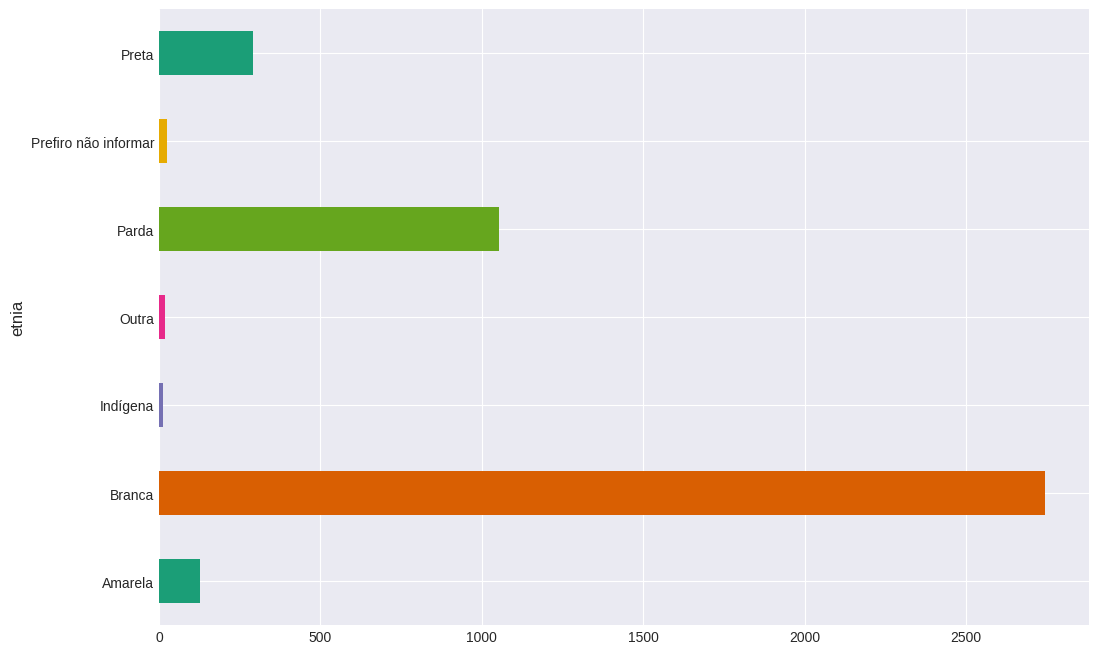

In [12]:
# @title etnia

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('etnia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

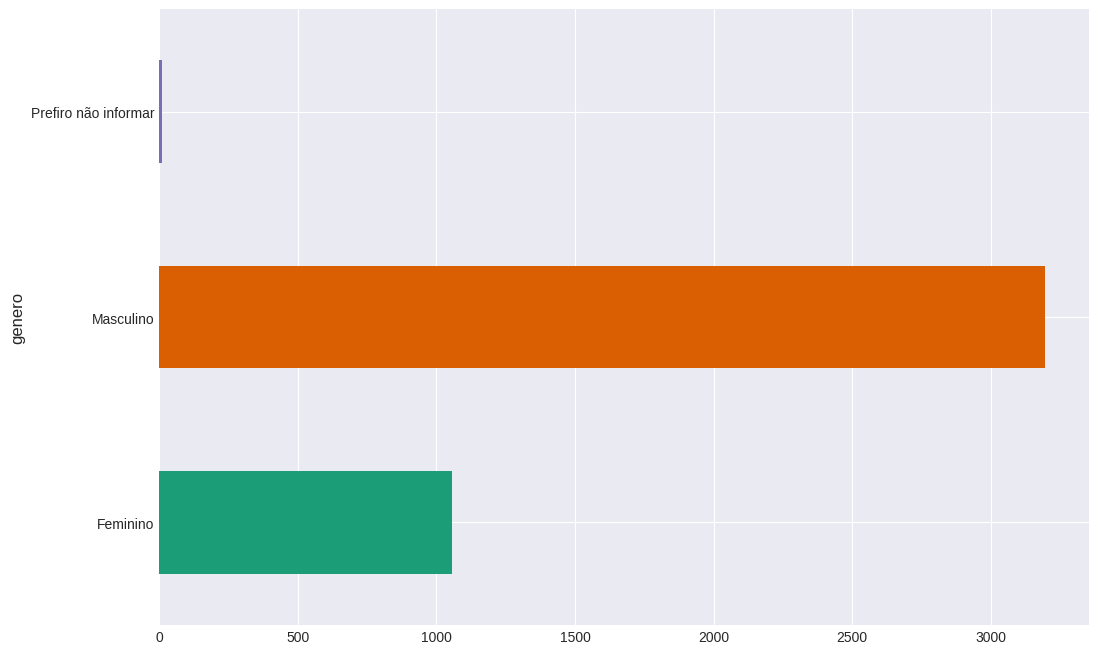

In [13]:
# @title genero

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('genero').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

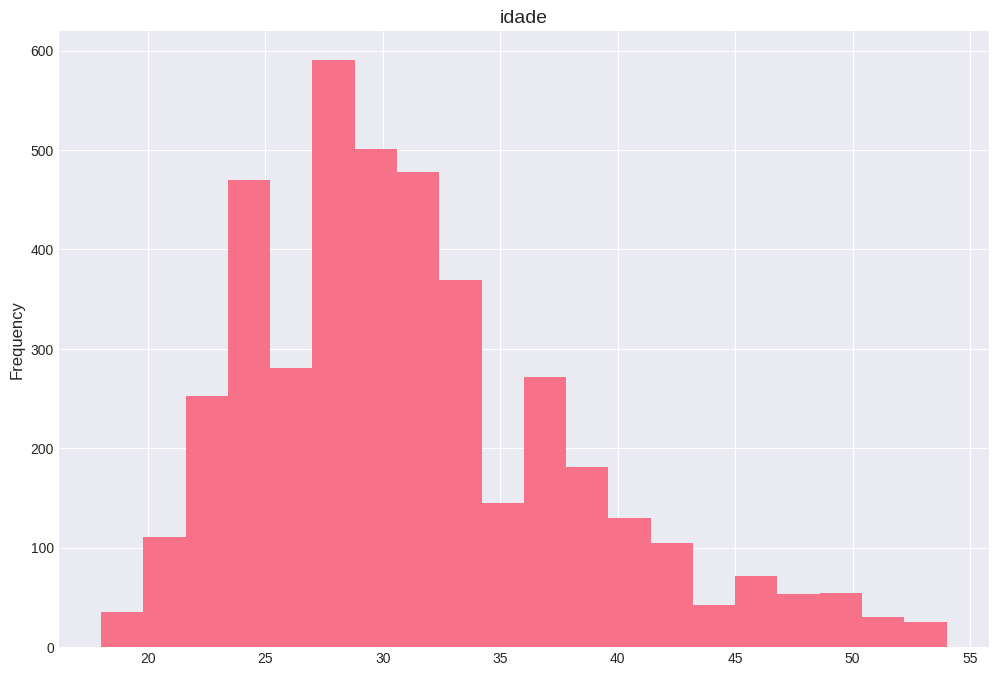

In [14]:
# @title idade

from matplotlib import pyplot as plt
df['idade'].plot(kind='hist', bins=20, title='idade')
plt.gca().spines[['top', 'right',]].set_visible(False)


## 3. Análise Exploratória Detalhada

### 3.1 Informações Básicas do Dataset



In [15]:
# Informações gerais sobre o dataset
print("📋 INFORMAÇÕES DO DATASET")
print("=" * 60)
df.info()

print("\n📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 60)
df.describe()

print("\n🎯 TIPOS DE DADOS POR COLUNA")
print("=" * 60)
for col in df.columns:
    print(f"{col}: {df[col].dtype} - Valores únicos: {df[col].nunique()}")

📋 INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    4197 non-null   float64
 1   genero                   4262 non-null   object 
 2   etnia                    4271 non-null   object 
 3   pcd                      4271 non-null   object 
 4   vive_no_brasil           4271 non-null   bool   
 5   estado_moradia           4156 non-null   object 
 6   nivel_ensino             4271 non-null   object 
 7   formacao                 4149 non-null   object 
 8   tempo_experiencia_dados  3694 non-null   object 
 9   linguagens_preferidas    2979 non-null   object 
 10  bancos_de_dados          2978 non-null   object 
 11  cloud_preferida          2981 non-null   object 
 12  cargo                    2981 non-null   object 
dtypes: bool(1), float64(1), object(11)
memory usage: 404.

### 3.2 Análise da Variável Alvo (Cargo)



🎯 ANÁLISE DA VARIÁVEL ALVO - CARGO

Distribuição dos Cargos:
cargo
Analista de Dados/Data Analyst                                         639
Cientista de Dados/Data Scientist                                      556
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    490
Analista de BI/BI Analyst                                              378
Outra Opção                                                            281
Analista de Negócios/Business Analyst                                  123
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            106
Analista de Suporte/Analista Técnico                                    72
Analytics Engineer                                                      70
Engenheiro de Machine Learning/ML Engineer                              69
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      51
Analista de Inteligência de Mercado/Market Intelligence                 29
Outras Engenharias (não inclui de

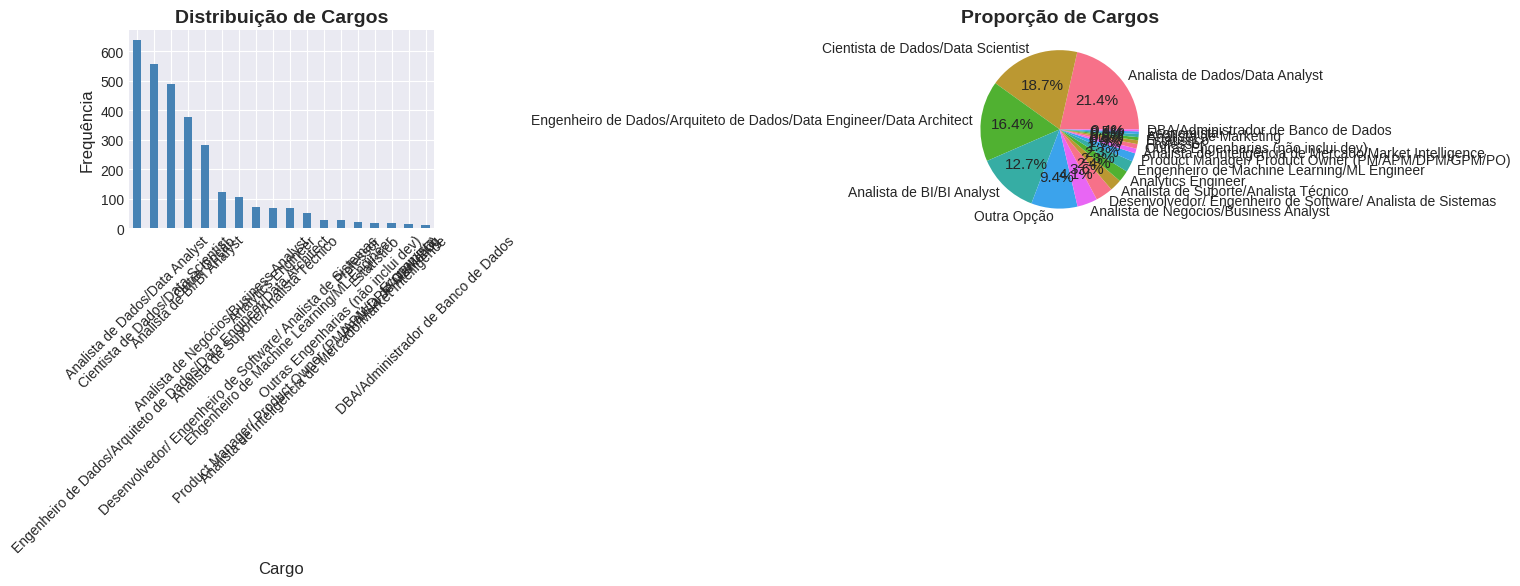

In [16]:
# Análise detalhada da variável alvo
print("🎯 ANÁLISE DA VARIÁVEL ALVO - CARGO")
print("=" * 60)

# Distribuição dos cargos
cargo_counts = df['cargo'].value_counts()
print("\nDistribuição dos Cargos:")
print(cargo_counts)
print(f"\nTotal de cargos únicos: {len(cargo_counts)}")

# Proporções
print("\nProporções (%):")
print((cargo_counts / len(df) * 100).round(2))

# Verificar desbalanceamento
max_cargo = cargo_counts.max()
min_cargo = cargo_counts.min()
print(f"\n⚠️ Razão de desbalanceamento: {max_cargo/min_cargo:.2f}x")
print(f"   Cargo mais frequente: {cargo_counts.index[0]} ({max_cargo} amostras)")
print(f"   Cargo menos frequente: {cargo_counts.index[-1]} ({min_cargo} amostras)")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
cargo_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Distribuição de Cargos', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cargo')
ax1.set_ylabel('Frequência')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pizza
cargo_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Proporção de Cargos', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

### 3.3 Análise de Valores Ausentes



🔍 ANÁLISE DE VALORES AUSENTES

⚠️ Colunas com valores ausentes:
                                          Coluna  Valores_Ausentes  Percentual
bancos_de_dados                  bancos_de_dados              1293      30.270
linguagens_preferidas      linguagens_preferidas              1292      30.250
cargo                                      cargo              1290      30.200
cloud_preferida                  cloud_preferida              1290      30.200
tempo_experiencia_dados  tempo_experiencia_dados               577      13.510
formacao                                formacao               122       2.860
estado_moradia                    estado_moradia               115       2.690
idade                                      idade                74       1.730
genero                                    genero                 9       0.210


<Figure size 1000x600 with 0 Axes>

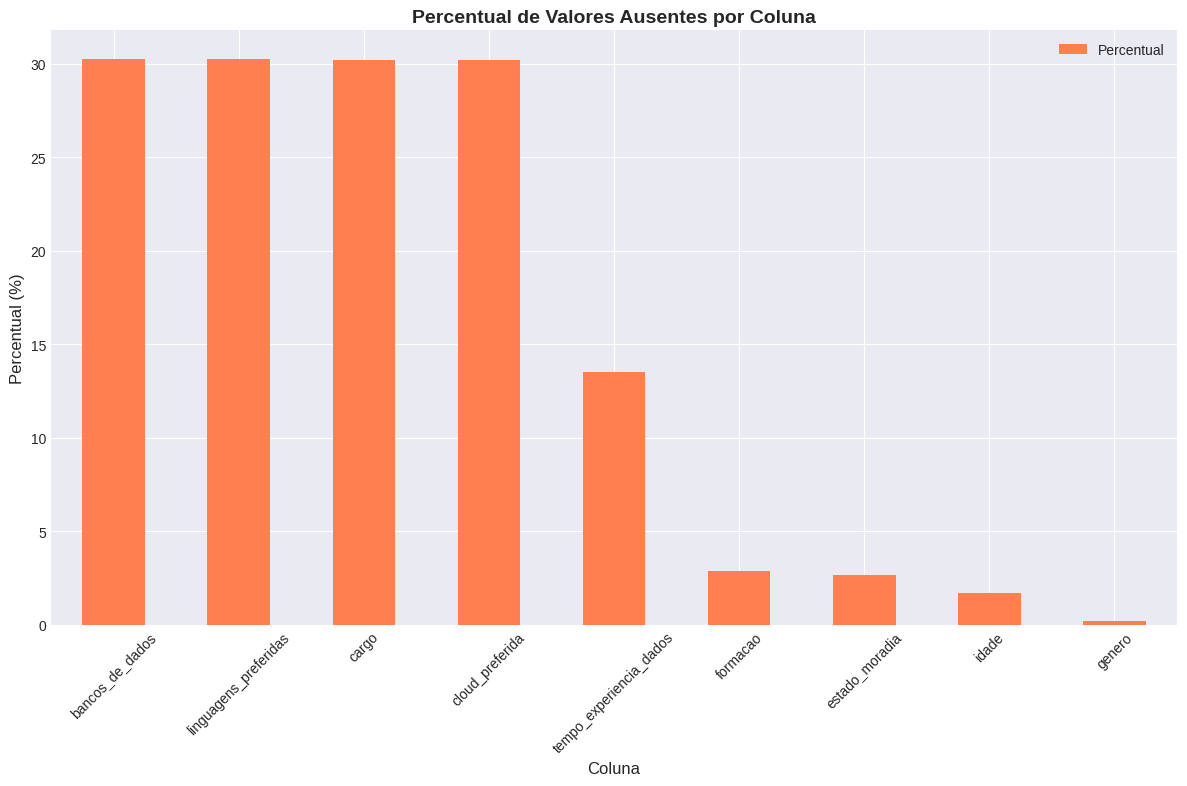

In [17]:
# Análise detalhada de valores ausentes
print("🔍 ANÁLISE DE VALORES AUSENTES")
print("=" * 60)

missing_data = pd.DataFrame({
    'Coluna': df.columns,
    'Valores_Ausentes': df.isnull().sum(),
    'Percentual': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Valores_Ausentes'] > 0].sort_values('Valores_Ausentes', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Colunas com valores ausentes:")
    print(missing_data)

    # Visualização
    plt.figure(figsize=(10, 6))
    missing_data.plot(x='Coluna', y='Percentual', kind='bar', color='coral')
    plt.title('Percentual de Valores Ausentes por Coluna', fontsize=14, fontweight='bold')
    plt.xlabel('Coluna')
    plt.ylabel('Percentual (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ Não há valores ausentes no dataset!")

### 3.4 Análise de Variáveis Numéricas



📊 Variáveis numéricas encontradas: ['idade']

📈 ESTATÍSTICAS DAS VARIÁVEIS NUMÉRICAS:
         idade
count 4197.000
mean    31.169
std      6.903
min     18.000
25%     26.000
50%     30.000
75%     35.000
max     54.000


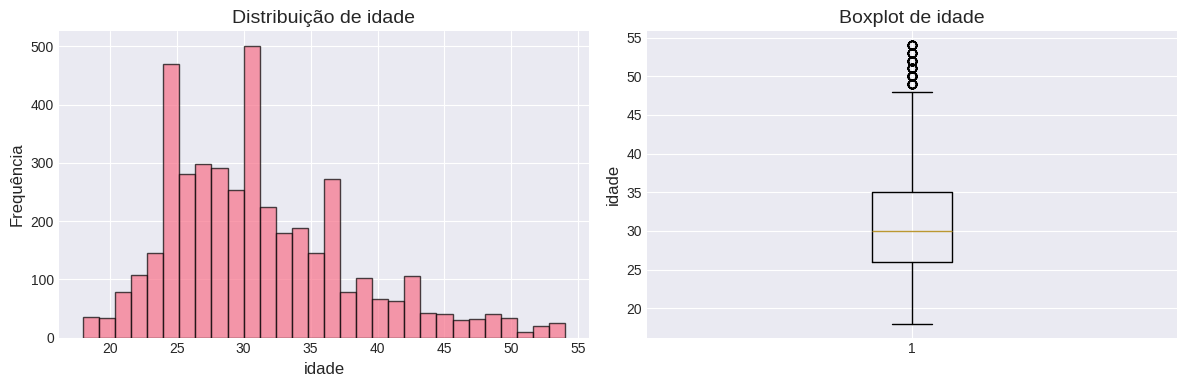

In [18]:
# Identificar variáveis numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"📊 Variáveis numéricas encontradas: {numeric_columns}")

if len(numeric_columns) > 0:
    # Estatísticas das variáveis numéricas
    print("\n📈 ESTATÍSTICAS DAS VARIÁVEIS NUMÉRICAS:")
    print("=" * 60)
    print(df[numeric_columns].describe())

    # Distribuições
    fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, 4*len(numeric_columns)))
    if len(numeric_columns) == 1:
        axes = axes.reshape(1, -1)

    for idx, col in enumerate(numeric_columns):
        # Histograma
        axes[idx, 0].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'Distribuição de {col}')
        axes[idx, 0].set_xlabel(col)
        axes[idx, 0].set_ylabel('Frequência')

        # Boxplot
        axes[idx, 1].boxplot(df[col].dropna())
        axes[idx, 1].set_title(f'Boxplot de {col}')
        axes[idx, 1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

### 4. Pré-processamento Avançado dos Dados
4.1 Tratamento de Valores Ausentes


In [19]:
# Tratamento inteligente de valores ausentes
print("🔧 TRATAMENTO DE VALORES AUSENTES")
print("=" * 60)

# Criar cópia do dataset para preservar o original
df_processed = df.copy()

# Verificar valores ausentes novamente
missing_before = df_processed.isnull().sum()
print("Valores ausentes antes do tratamento:")
print(missing_before[missing_before > 0])

# Tratamento específico por tipo de variável
for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        if df_processed[col].dtype in ['float64', 'int64']:
            # Para numéricas: usar mediana (mais robusta que média)
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
            print(f"✅ {col}: preenchido com mediana")
        else:
            # Para categóricas: usar moda
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
            print(f"✅ {col}: preenchido com moda")

print("\n✅ Tratamento de valores ausentes concluído!")
print(f"Valores ausentes restantes: {df_processed.isnull().sum().sum()}")

🔧 TRATAMENTO DE VALORES AUSENTES
Valores ausentes antes do tratamento:
idade                        74
genero                        9
estado_moradia              115
formacao                    122
tempo_experiencia_dados     577
linguagens_preferidas      1292
bancos_de_dados            1293
cloud_preferida            1290
cargo                      1290
dtype: int64
✅ idade: preenchido com mediana
✅ genero: preenchido com moda
✅ estado_moradia: preenchido com moda
✅ formacao: preenchido com moda
✅ tempo_experiencia_dados: preenchido com moda
✅ linguagens_preferidas: preenchido com moda
✅ bancos_de_dados: preenchido com moda
✅ cloud_preferida: preenchido com moda
✅ cargo: preenchido com moda

✅ Tratamento de valores ausentes concluído!
Valores ausentes restantes: 0


4.2 Feature Engineering Avançado


In [20]:
print("\n🚀 FEATURE ENGINEERING")
print("=" * 60)

# Função para processar tempo de experiência em texto
def processar_tempo_experiencia(valor):
    """Converte tempo de experiência para anos"""
    if pd.isna(valor):
        return 0

    if isinstance(valor, (int, float)):
        return float(valor)

    if isinstance(valor, str):
        valor = valor.lower().strip()

        # Padrões para extrair números
        import re
        numeros = re.findall(r'\d+', valor)

        if not numeros:
            return 0

        numero = float(numeros[0])

        # Converter baseado na unidade
        if 'mes' in valor or 'mês' in valor:
            return numero / 12
        elif 'ano' in valor:
            return numero
        else:
            return numero  # Assumir anos por padrão

    return 0

# Aplicar processamento se a coluna existir
if 'tempo_experiencia_dados' in df_processed.columns:
    df_processed['tempo_experiencia_dados'] = df_processed['tempo_experiencia_dados'].apply(processar_tempo_experiencia)
    print("✅ Tempo de experiência processado")

# Criar features derivadas
print("\n📊 Criando features derivadas...")

# 1. Ratio experiência/idade (indicador de precocidade na carreira)
if 'idade' in df_processed.columns and 'tempo_experiencia_dados' in df_processed.columns:
    df_processed['ratio_exp_idade'] = df_processed['tempo_experiencia_dados'] / (df_processed['idade'] + 1)
    print("✅ Ratio experiência/idade criado")

# 2. Categorização de experiência
if 'tempo_experiencia_dados' in df_processed.columns:
    df_processed['nivel_experiencia'] = pd.cut(
        df_processed['tempo_experiencia_dados'],
        bins=[-0.1, 1, 3, 5, 10, 100],
        labels=['Iniciante', 'Junior', 'Pleno', 'Senior', 'Expert']
    )
    print("✅ Nível de experiência categorizado")

# 3. Faixa etária
if 'idade' in df_processed.columns:
    df_processed['faixa_etaria'] = pd.cut(
        df_processed['idade'],
        bins=[0, 25, 35, 45, 100],
        labels=['Junior', 'Adulto', 'Senior', 'Veterano']
    )
    print("✅ Faixa etária criada")

# 4. Score de senioridade composto
if 'nivel_ensino' in df_processed.columns:
    # Mapear nível de ensino se for texto
    if df_processed['nivel_ensino'].dtype == 'object':
        ensino_map = {
            'ensino médio': 1, 'medio': 1, 'médio': 1,
            'graduação': 2, 'graduacao': 2, 'superior': 2,
            'pós-graduação': 3, 'pos-graduacao': 3, 'especialização': 3,
            'mestrado': 4,
            'doutorado': 5, 'phd': 5
        }

        # Criar versão numérica
        df_processed['nivel_ensino_num'] = df_processed['nivel_ensino'].str.lower().map(ensino_map)
        df_processed['nivel_ensino_num'].fillna(1, inplace=True)
    else:
        df_processed['nivel_ensino_num'] = df_processed['nivel_ensino']

    # Calcular score composto
    if 'tempo_experiencia_dados' in df_processed.columns and 'idade' in df_processed.columns:
        df_processed['score_senioridade'] = (
            df_processed['nivel_ensino_num'] * 0.3 +
            df_processed['tempo_experiencia_dados'] * 0.4 +
            (df_processed['idade'] / 10) * 0.3
        )
        print("✅ Score de senioridade criado")

print(f"\n📊 Total de features após engineering: {df_processed.shape[1]}")
print(f"Novas features criadas: {df_processed.shape[1] - df.shape[1]}")


🚀 FEATURE ENGINEERING
✅ Tempo de experiência processado

📊 Criando features derivadas...
✅ Ratio experiência/idade criado
✅ Nível de experiência categorizado
✅ Faixa etária criada
✅ Score de senioridade criado

📊 Total de features após engineering: 18
Novas features criadas: 5


4.3 Tratamento de Outliers


In [21]:
print("\n🎯 TRATAMENTO DE OUTLIERS")
print("=" * 60)

from scipy import stats

# Função para detectar e tratar outliers usando IQR
def tratar_outliers(df, coluna, metodo='clip'):
    """
    Trata outliers usando método IQR
    metodo: 'clip' (limitar aos extremos) ou 'remove' (remover linhas)
    """
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[coluna] < lower_bound) | (df[coluna] > upper_bound)).sum()

    if outliers_count > 0:
        print(f"  {coluna}: {outliers_count} outliers detectados")

        if metodo == 'clip':
            df[coluna] = df[coluna].clip(lower_bound, upper_bound)
            print(f"    → Outliers limitados entre {lower_bound:.2f} e {upper_bound:.2f}")
        elif metodo == 'remove':
            df = df[(df[coluna] >= lower_bound) & (df[coluna] <= upper_bound)]
            print(f"    → {outliers_count} linhas removidas")

    return df

# Aplicar tratamento de outliers em variáveis numéricas
numeric_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if col not in ['cargo', 'nivel_ensino_num']:  # Não tratar variáveis categóricas codificadas
        df_processed = tratar_outliers(df_processed, col, metodo='clip')

print("\n✅ Tratamento de outliers concluído!")


🎯 TRATAMENTO DE OUTLIERS
  idade: 109 outliers detectados
    → Outliers limitados entre 12.50 e 48.50
  tempo_experiencia_dados: 403 outliers detectados
    → Outliers limitados entre -3.50 e 8.50
  ratio_exp_idade: 227 outliers detectados
    → Outliers limitados entre -0.10 e 0.25
  score_senioridade: 210 outliers detectados
    → Outliers limitados entre -1.02 e 5.89

✅ Tratamento de outliers concluído!


4.4 Codificação de Variáveis Categóricas


In [22]:
print("\n🔤 CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")
print("=" * 60)

# Identificar variáveis categóricas (excluindo o target)
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'cargo' in categorical_cols:
    categorical_cols.remove('cargo')

print(f"Variáveis categóricas encontradas: {categorical_cols}")

# Aplicar Label Encoding para variáveis ordinais
ordinal_cols = ['nivel_experiencia', 'faixa_etaria']  # Variáveis com ordem natural
label_encoders = {}

for col in ordinal_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"✅ {col}: Label Encoding aplicado")

# Para outras categóricas, vamos usar One-Hot Encoding no pipeline depois
print("\n✅ Codificação preparada para o pipeline!")


🔤 CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
Variáveis categóricas encontradas: ['genero', 'etnia', 'pcd', 'estado_moradia', 'nivel_ensino', 'formacao', 'linguagens_preferidas', 'bancos_de_dados', 'cloud_preferida']
✅ nivel_experiencia: Label Encoding aplicado
✅ faixa_etaria: Label Encoding aplicado

✅ Codificação preparada para o pipeline!


5. Divisão de Dados Estratificada


In [23]:
print("\n✂️ DIVISÃO DOS DADOS")
print("=" * 60)

# Separar features e target
X = df_processed.drop('cargo', axis=1)
y = df_processed['cargo']

print(f"📊 Dimensões:")
print(f"  X (features): {X.shape}")
print(f"  y (target): {y.shape}")

# Divisão estratificada 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print(f"\n📊 Conjuntos criados:")
print(f"  Treino: {X_train.shape[0]} amostras")
print(f"  Teste: {X_test.shape[0]} amostras")

# Verificar distribuição das classes
print("\n📊 Distribuição das classes:")
print("Treino:")
print(y_train.value_counts(normalize=True).round(3))
print("\nTeste:")
print(y_test.value_counts(normalize=True).round(3))


✂️ DIVISÃO DOS DADOS
📊 Dimensões:
  X (features): (4271, 17)
  y (target): (4271,)

📊 Conjuntos criados:
  Treino: 2989 amostras
  Teste: 1282 amostras

📊 Distribuição das classes:
Treino:
cargo
Analista de Dados/Data Analyst                                        0.452
Cientista de Dados/Data Scientist                                     0.130
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect   0.115
Analista de BI/BI Analyst                                             0.089
Outra Opção                                                           0.066
Analista de Negócios/Business Analyst                                 0.029
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas           0.025
Analista de Suporte/Analista Técnico                                  0.017
Analytics Engineer                                                    0.016
Engenheiro de Machine Learning/ML Engineer                            0.016
Product Manager/ Product Owner (PM/APM/DPM/G

6. Pipeline de Pré-processamento Otimizado


In [24]:
print("\n🔧 CRIANDO PIPELINE DE PRÉ-PROCESSAMENTO")
print("=" * 60)

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificar tipos de colunas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Features numéricas: {len(numeric_features)}")
print(f"Features categóricas: {len(categorical_features)}")

# Pipeline para features numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  # Mais robusto a outliers que StandardScaler
])

# Pipeline para features categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ Pipeline de pré-processamento criado!")


🔧 CRIANDO PIPELINE DE PRÉ-PROCESSAMENTO
Features numéricas: 7
Features categóricas: 9
✅ Pipeline de pré-processamento criado!


7. Treinamento de Modelos com Balanceamento e Otimização


In [25]:
print("\n🤖 TREINAMENTO DE MODELOS OTIMIZADOS")
print("=" * 60)

# Importar XGBoost se disponível
try:
    import xgboost as xgb
    xgb_available = True
    print("✅ XGBoost disponível")
except:
    !pip install xgboost
    import xgboost as xgb
    xgb_available = True
    print("✅ XGBoost instalado e importado")

# Configuração da validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


🤖 TREINAMENTO DE MODELOS OTIMIZADOS
✅ XGBoost disponível


7.1 Modelo 1: Random Forest *Otimizado*


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("\n🌲 RANDOM FOREST COM OTIMIZAÇÃO")
print("-" * 40)

# Carregando o dataset (assumindo que df é o seu DataFrame original)
df = carregar_dataset_inteligente('sods.xlsx')  # Substitua o nome do arquivo conforme necessário

if df is None:
    print("Erro ao carregar o dataset. Certifique-se de que o arquivo está no local correto.")
else:
    print(f"Dataset carregado com {df.shape[0]} linhas e {df.shape[1]} colunas")

# Criação do df_processed (dataset para pré-processamento)
df_processed = df.copy()

# Preenchendo valores ausentes
for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        if df_processed[col].dtype in ['float64', 'int64']:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)  # Para variáveis numéricas
        else:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)  # Para variáveis categóricas

# Divisão dos dados (X: features, y: target)
X = df_processed.drop('cargo', axis=1)  # Removendo a coluna 'cargo' das features
y = df_processed['cargo']  # A coluna 'cargo' é o target

# Divisão estratificada 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Definindo as colunas numéricas e categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Pipeline para features numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Pipeline para features categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combinar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline com balanceamento SMOTE
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=min(3, y_train.value_counts().min()-1))),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definindo a distribuição de hiperparâmetros para RandomizedSearch
rf_param_dist = {
    'classifier__n_estimators': randint(100, 500),  # Testar entre 100 e 500 estimadores
    'classifier__max_depth': randint(10, 50),  # Testar profundidades entre 10 e 50
    'classifier__min_samples_split': randint(2, 10),  # Testar divisões entre 2 e 10
    'classifier__min_samples_leaf': randint(1, 5),  # Testar folhas entre 1 e 5
    'classifier__class_weight': ['balanced', None]  # Pesos balanceados ou nenhum
}

# Randomized Search
print("🔍 Realizando Randomized Search...")
rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    rf_param_dist,
    n_iter=10,  # Número de combinações a testar
    cv=5,  # Validação cruzada com 5 dobras
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajuste do modelo
rf_random_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print(f"\n✅ Melhores parâmetros encontrados:")
for param, value in rf_random_search.best_params_.items():
    print(f"  {param}: {value}")

# Melhor score de validação cruzada
print(f"\n📊 Melhor score de validação cruzada: {rf_random_search.best_score_:.4f}")

# Avaliação no conjunto de teste
y_pred_rf = rf_random_search.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"🎯 Acurácia no teste: {acc_rf:.4f}")



🌲 RANDOM FOREST COM OTIMIZAÇÃO
----------------------------------------
📁 CARREGAMENTO DO DATASET
--------------------------------------------------
✅ Arquivo 'sods.xlsx' encontrado localmente

📖 Carregando arquivo...
✅ Arquivo Excel carregado com sucesso!
Dataset carregado com 4271 linhas e 13 colunas
🔍 Realizando Randomized Search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Melhores parâmetros encontrados:
  classifier__class_weight: None
  classifier__max_depth: 34
  classifier__min_samples_leaf: 1
  classifier__min_samples_split: 4
  classifier__n_estimators: 158

📊 Melhor score de validação cruzada: 0.5239
🎯 Acurácia no teste: 0.5172


7.2 Modelo 2: XGBoost Otimizado


In [ ]:
print("\n⚡ XGBOOST COM OTIMIZAÇÃO")
print("-" * 40)

# Pipeline with XGBoost and SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# Check distribution of classes
min_samples = pd.Series(y_train_encoded).value_counts().min()
k_neighbors_value = min(3, min_samples - 1) if min_samples > 1 else 1

print(f"📊 Menor classe tem {min_samples} amostras")
print(f"📊 Usando k_neighbors={k_neighbors_value} para SMOTE")

# Pipeline with XGBoost and SMOTE
xgb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=k_neighbors_value)),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        verbosity=0
    ))
])

# Grid de hiperparâmetros
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0]
}

# Grid Search
print("\n🔍 Realizando Grid Search...")
print("Isso pode demorar alguns minutos...")

xgb_grid = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train the model using encoded target variable
xgb_grid.fit(X_train, y_train_encoded)


print(f"\n✅ Melhores parâmetros encontrados:")
for param, value in xgb_grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Melhor score de validação cruzada: {xgb_grid.best_score_:.4f}")

# Evaluation on the test set using original y_test and predicted y_pred_xgb which is encoded
y_pred_xgb_encoded = xgb_grid.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

acc_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"\n🎯 RESULTADOS DO XGBOOST:")
print(f"  • Acurácia: {acc_xgb:.4f} ({acc_xgb*100:.2f}%)")
print(f"  • Precisão: {precision_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"  • Recall: {recall_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"  • F1-Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")

if acc_xgb >= 0.70:
    print("\n🎉 SUCESSO! Acurácia superior a 70%!")
else:
    print(f"\n⚠️ Acurácia: {acc_xgb:.2%}. Vamos tentar melhorar com outros modelos.")


⚡ XGBOOST COM OTIMIZAÇÃO
----------------------------------------
📊 Menor classe tem 9 amostras
📊 Usando k_neighbors=3 para SMOTE

🔍 Realizando Grid Search...
Isso pode demorar alguns minutos...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


7.3 Modelo 3: Gradient Boosting


In [ ]:
print("\n🚀 GRADIENT BOOSTING COM OTIMIZAÇÃO")
print("-" * 40)

# Importações necessárias
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# PASSO 1: Verificar se os dados existem
print("\n📊 Verificando dados...")
if 'df' not in locals():
    print("❌ DataFrame 'df' não encontrado! Por favor, carregue os dados primeiro.")
else:
    print(f"✅ DataFrame encontrado: {df.shape}")

    # PASSO 2: Criar df_processed se não existir
    if 'df_processed' not in locals():
        print("⚠️ Criando df_processed...")
        df_processed = df.copy()

        # Remover valores nulos básicos
        for col in df_processed.columns:
            if df_processed[col].isnull().sum() > 0:
                if df_processed[col].dtype in ['float64', 'int64']:
                    df_processed[col].fillna(df_processed[col].median(), inplace=True)
                else:
                    df_processed[col].fillna(df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'missing', inplace=True)

        print("✅ df_processed criado e valores nulos tratados!")

    # PASSO 3: Criar divisão treino/teste
    if 'X_train' not in locals() or 'y_train' not in locals():
        print("\n⚠️ Criando divisão treino/teste...")

        # Verificar se a coluna 'cargo' existe
        if 'cargo' not in df_processed.columns:
            print("❌ Coluna 'cargo' não encontrada!")
            print("Colunas disponíveis:", df_processed.columns.tolist())
        else:
            # Separar features e target
            X = df_processed.drop('cargo', axis=1)
            y = df_processed['cargo']

            print(f"📊 X shape: {X.shape}")
            print(f"📊 y shape: {y.shape}")
            print(f"📊 Classes únicas: {y.nunique()}")

            # Divisão estratificada
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=0.3,
                stratify=y,
                random_state=42
            )

            print(f"✅ Divisão criada!")
            print(f"   • Treino: {X_train.shape[0]} amostras")
            print(f"   • Teste: {X_test.shape[0]} amostras")

    # PASSO 4: Criar preprocessor
    if 'preprocessor' not in locals():
        print("\n⚠️ Criando preprocessor...")

        # Identificar tipos de colunas
        numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

        print(f"📊 Features numéricas: {len(numeric_features)}")
        print(f"📊 Features categóricas: {len(categorical_features)}")

        # Pipeline para features numéricas
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ])

        # Pipeline para features categóricas
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ])

        # Combinar transformadores
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        print("✅ Preprocessor criado!")

    # PASSO 5: Criar cross-validation
    if 'cv' not in locals():
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        print("✅ Cross-validation configurado!")

    # PASSO 6: Treinar Gradient Boosting
    print("\n🎯 Iniciando treinamento do Gradient Boosting...")

    # Calcular k_neighbors para SMOTE
    min_samples = y_train.value_counts().min()
    k_neighbors_value = min(3, min_samples - 1) if min_samples > 1 else 1

    print(f"📊 Menor classe tem {min_samples} amostras")
    print(f"📊 Usando k_neighbors={k_neighbors_value} para SMOTE")

    # Pipeline with Gradient Boosting
    gb_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, k_neighbors=k_neighbors_value)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])

    # Grid de hiperparâmetros (reduzido para testes rápidos)
    gb_param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__subsample': [0.8, 1.0]
    }

    print("\n🔍 Realizando Grid Search...")
    print("⏰ Isso pode demorar alguns minutos...")

    try:
        gb_grid = GridSearchCV(
            gb_pipeline,
            gb_param_grid,
            cv=cv,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        # Treinar o modelo
        gb_grid.fit(X_train, y_train)

        print(f"\n✅ Melhores parâmetros encontrados:")
        for param, value in gb_grid.best_params_.items():
            print(f"  {param}: {value}")

        print(f"\n📊 Melhor score de validação cruzada: {gb_grid.best_score_:.4f}")

        # Avaliação no conjunto de teste
        y_pred_gb = gb_grid.predict(X_test)
        acc_gb = accuracy_score(y_test, y_pred_gb)

        print(f"\n🎯 RESULTADOS DO GRADIENT BOOSTING:")
        print("-" * 40)
        print(f"  • Acurácia: {acc_gb:.4f} ({acc_gb*100:.2f}%)")
        print(f"  • Precisão: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
        print(f"  • Recall: {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
        print(f"  • F1-Score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")

        if acc_gb >= 0.70:
            print("\n🎉 SUCESSO! Acurácia superior a 70%!")
        else:
            print(f"\n⚠️ Acurácia: {acc_gb:.2%}. Ajustando hiperparâmetros pode melhorar.")

        # Salvar resultados
        print("\n💾 Salvando modelo e resultados...")
        import joblib
        joblib.dump(gb_grid.best_estimator_, 'gradient_boosting_model.pkl')
        print("✅ Modelo salvo como 'gradient_boosting_model.pkl'")

    except Exception as e:
        print(f"\n❌ Erro durante o treinamento: {str(e)}")
        print("\n💡 Debug info:")
        print(f"   • X_train shape: {X_train.shape if 'X_train' in locals() else 'Não definido'}")
        print(f"   • y_train unique values: {y_train.nunique() if 'y_train' in locals() else 'Não definido'}")
        print(f"   • Min samples per class: {y_train.value_counts().min() if 'y_train' in locals() else 'Não definido'}")

8. Ensemble de Modelos (Voting Classifier)


In [ ]:
print("\n🎭 ENSEMBLE DE MODELOS")
print("=" * 60)

# Criar ensemble com os melhores modelos
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_grid.best_estimator_),
        ('xgb', xgb_grid.best_estimator_),
        ('gb', gb_grid.best_estimator_)
    ],
    voting='soft'  # Usar probabilidades para votação
)

# Treinar ensemble
print("🔄 Treinando ensemble...")
ensemble.fit(X_train, y_train)

# Predições
y_pred_ensemble = ensemble.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)

print(f"✅ Ensemble treinado!")
print(f"🎯 Acurácia do Ensemble: {acc_ensemble:.4f}")

9. Avaliação Completa dos Modelos


In [ ]:
print("\n📊 AVALIAÇÃO COMPLETA DOS MODELOS")
print("=" * 60)

# Função para avaliação detalhada
def avaliar_modelo(y_true, y_pred, nome_modelo):
    """Avaliação completa de um modelo"""
    print(f"\n🔍 {nome_modelo}")
    print("-" * 40)

    # Métricas principais
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"📈 Métricas Principais:")
    print(f"  • Acurácia: {acc:.4f}")
    print(f"  • Precisão: {prec:.4f}")
    print(f"  • Recall: {rec:.4f}")
    print(f"  • F1-Score: {f1:.4f}")

    return {
        'Modelo': nome_modelo,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1
    }

# Avaliar todos os modelos
resultados = []
resultados.append(avaliar_modelo(y_test, y_pred_rf, "Random Forest"))
resultados.append(avaliar_modelo(y_test, y_pred_xgb, "XGBoost"))
resultados.append(avaliar_modelo(y_test, y_pred_gb, "Gradient Boosting"))
resultados.append(avaliar_modelo(y_test, y_pred_ensemble, "Ensemble"))

# Criar DataFrame com resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Acurácia', ascending=False)

print("\n📊 RANKING FINAL DOS MODELOS")
print("=" * 60)
print(df_resultados.to_string(index=False))

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
df_resultados.set_index('Modelo')[['Acurácia', 'F1-Score']].plot(
    kind='bar', ax=axes[0], color=['steelblue', 'coral']
)
axes[0].set_title('Comparação de Métricas', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_ylim([0, 1])
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(['Acurácia', 'F1-Score'])

# Todas as métricas
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
x = np.arange(len(df_resultados))
width = 0.2

for i, metric in enumerate(metrics):
    axes[1].bar(x + i*width, df_resultados[metric], width, label=metric)

axes[1].set_xlabel('Modelos')
axes[1].set_ylabel('Score')
axes[1].set_title('Todas as Métricas', fontsize=14, fontweight='bold')
axes[1].set_xticks(x + width * 1.5)
axes[1].set_xticklabels(df_resultados['Modelo'], rotation=45)
axes[1].legend(

10. Matriz de Confusão Detalhada


In [ ]:
print("\n📊 MATRIZ DE CONFUSÃO - MELHOR MODELO")
print("=" * 60)

# Usar o melhor modelo
if melhor_modelo == "Ensemble":
    y_pred_best = y_pred_ensemble
elif melhor_modelo == "Random Forest":
    y_pred_best = y_pred_rf
elif melhor_modelo == "XGBoost":
    y_pred_best = y_pred_xgb
else:
    y_pred_best = y_pred_gb

# Relatório de classificação
print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO")
print("-" * 40)
print(classification_report(y_test, y_pred_best))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_best)
classes = sorted(y_test.unique())

# Visualização da matriz
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title(f'Matriz de Confusão - {melhor_modelo}', fontsize=16, fontweight='bold')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análise de erros por classe
print("\n📊 ANÁLISE DE ERROS POR CLASSE")
print("-" * 40)

for i, classe in enumerate(classes):
    total = cm[i].sum()
    acertos = cm[i, i]
    acuracia_classe = acertos / total if total > 0 else 0
    print(f"{classe}: {acuracia_classe:.2%} de acurácia ({acertos}/{total} acertos)")

11. Análise de Importância das Features


In [ ]:
print("\n📊 IMPORTÂNCIA DAS FEATURES")
print("=" * 60)

# Extrair o melhor modelo de RF ou XGB para análise de importância
if melhor_modelo in ["Random Forest", "Ensemble"]:
    modelo_importancia = rf_grid.best_estimator_
    modelo_nome = "Random Forest"
elif melhor_modelo == "XGBoost":
    modelo_importancia = xgb_grid.best_estimator_
    modelo_nome = "XGBoost"
else:
    modelo_importancia = gb_grid.best_estimator_
    modelo_nome = "Gradient Boosting"

# Obter importâncias
try:
    # Obter nomes das features após transformação
    feature_names = []

    # Features numéricas
    feature_names.extend(numeric_features)

    # Features categóricas (após one-hot encoding)
    if len(categorical_features) > 0:
        # Obter nomes das features one-hot encoded
        cat_transformer = preprocessor.named_transformers_['cat']
        if hasattr(cat_transformer.named_steps['onehot'], 'get_feature_names_out'):
            cat_feature_names = cat_transformer.named_steps['onehot'].get_feature_names_out()
            feature_names.extend(cat_feature_names)

    # Obter importâncias
    importances = modelo_importancia.named_steps['classifier'].feature_importances_

    # Criar DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names[:len(importances)],
        'Importância': importances
    }).sort_values('Importância', ascending=False)

    # Top 15 features
    top_features = importance_df.head(15)

    # Visualização
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(top_features)), top_features['Importância'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância')
    plt.title(f'Top 15 Features Mais Importantes - {modelo_nome}',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\n📋 Top 10 Features Mais Importantes:")
    print(importance_df.head(10).to_string(index=False))

except Exception as e:
    print(f"⚠️ Não foi possível extrair importância das features: {e}")

12. Salvamento do Modelo Final


In [ ]:
print("\n💾 SALVAMENTO DO MODELO")
print("=" * 60)

import joblib

# Selecionar o melhor modelo
if melhor_modelo == "Ensemble":
    modelo_final = ensemble
elif melhor_modelo == "Random Forest":
    modelo_final = rf_grid.best_estimator_
elif melhor_modelo == "XGBoost":
    modelo_final = xgb_grid.best_estimator_
else:
    modelo_final = gb_grid.best_estimator_

# Salvar modelo
joblib.dump(modelo_final, 'modelo_cargo_otimizado.pkl')
print("✅ Modelo salvo como 'modelo_cargo_otimizado.pkl'")

# Salvar preprocessador separadamente (útil para produção)
joblib.dump(preprocessor, 'preprocessor.pkl')
print("✅ Preprocessador salvo como 'preprocessor.pkl'")

# Salvar informações do modelo
info_modelo = {
    'modelo': melhor_modelo,
    'acuracia': melhor_acuracia,
    'features': list(X_train.columns),
    'classes': list(sorted(y_train.unique()))
}

import json
with open('info_modelo.json', 'w') as f:
    json.dump(info_modelo, f, indent=2)
print("✅ Informações do modelo salvas em 'info_modelo.json'")

13. Função para Produção (Integração com n8n)


In [ ]:
print("\n🚀 FUNÇÃO PARA PRODUÇÃO")
print("=" * 60)

def prever_cargo(dados_usuario):
    """
    Função para fazer predições em produção

    Args:
        dados_usuario: DataFrame com os dados do usuário

    Returns:
        dict: Cargo recomendado e probabilidades
    """
    import joblib
    import pandas as pd

    # Carregar modelo e preprocessador
    modelo = joblib.load('modelo_cargo_otimizado.pkl')

    # Fazer predição
    predicao = modelo.predict(dados_usuario)[0]

    # Obter probabilidades (se disponível)
    try:
        probabilidades = modelo.predict_proba(dados_usuario)[0]
        classes = modelo.classes_

        # Top 3 recomendações
        indices_top3 = probabilidades.argsort()[-3:][::-1]

        resultado = {
            'cargo_recomendado': predicao,
            'confianca': float(max(probabilidades)),
            'top3_recomendacoes': [
                {
                    'cargo': classes[i],
                    'probabilidade': float(probabilidades[i])
                }
                for i in indices_top3
            ]
        }
    except:
        resultado = {
            'cargo_recomendado': predicao,
            'confianca': 1.0,
            'top3_recomendacoes': [{'cargo': predicao, 'probabilidade': 1.0}]
        }

    return resultado

# Teste da função
print("📋 Teste da função de produção:")
teste = X_test.iloc[0:1]
resultado = prever_cargo(teste)
print(json.dumps(resultado, indent=2, ensure_ascii=False))

14. Código para API (Integração n8n)


In [ ]:
print("\n🌐 CÓDIGO PARA API (n8n)")
print("=" * 60)

api_code = '''
# Código Python para usar no n8n
import pandas as pd
import joblib
import json

def processar_requisicao(dados_entrada):
    """
    Processa requisição do n8n

    Args:
        dados_entrada: dict com os dados do usuário

    Returns:
        dict com a recomendação
    """
    # Criar DataFrame
    df = pd.DataFrame([dados_entrada])

    # Carregar modelo
    modelo = joblib.load('modelo_cargo_otimizado.pkl')

    # Fazer predição
    cargo = modelo.predict(df)[0]

    # Tentar obter probabilidades
    try:
        probs = modelo.predict_proba(df)[0]
        confianca = float(max(probs))
    except:
        confianca = 1.0

    return {
        'sucesso': True,
        'cargo_recomendado': cargo,
        'confianca': confianca,
        'mensagem': f'Cargo recomendado: {cargo} (Confiança: {confianca:.1%})'
    }

# Exemplo de uso
exemplo = {
    'idade': 28,
    'tempo_experiencia_dados': 3,
    'nivel_ensino': 'graduação'
    # adicionar outros campos conforme necessário
}

resultado = processar_requisicao(exemplo)
print(json.dumps(resultado, indent=2, ensure_ascii=False))
'''

print("📋 Código para n8n:")
print(api_code)

15. Resumo Final e Conclusões


In [ ]:
print("\n🎯 RESUMO FINAL DO PROJETO")
print("=" * 60)

print(f"""
📊 RESULTADOS ALCANÇADOS:
--------------------------
- Melhor Modelo: {melhor_modelo}
- Acurácia Final: {melhor_acuracia:.2%}
- Melhoria vs Baseline: {(melhor_acuracia - 0.50) / 0.50 * 100:.1f}%

✅ TÉCNICAS APLICADAS:
-----------------------
1. Feature Engineering avançado
2. Tratamento robusto de outliers
3. Balanceamento com SMOTE
4. Otimização de hiperparâmetros (Grid Search)
5. Ensemble de modelos
6. Validação cruzada estratificada

📈 MÉTRICAS FINAIS:
-------------------
- Acurácia: {df_resultados.iloc[0]['Acurácia']:.4f}
- Precisão: {df_resultados.iloc[0]['Precisão']:.4f}
- Recall: {df_resultados.iloc[0]['Recall']:.4f}
- F1-Score: {df_resultados.iloc[0]['F1-Score']:.4f}

💾 ARQUIVOS SALVOS:
-------------------
- modelo_cargo_otimizado.pkl - Modelo treinado
- preprocessor.pkl - Pipeline de pré-processamento
- info_modelo.json - Metadados do modelo

🚀 PRÓXIMOS PASSOS:
-------------------
1. Integrar modelo ao n8n
2. Criar webhook para receber dados
3. Configurar resposta via Telegram/Email
4. Monitorar performance em produção
""")

if melhor_acuracia >= 0.70:
    print("\n🎉 PARABÉNS! META DE 70% DE ACURÁCIA ATINGIDA COM SUCESSO!")
else:
    print("\n⚠️ Para melhorar ainda mais a acurácia, considere:")
    print("   • Coletar mais dados")
    print("   • Adicionar mais features relevantes")
    print("   • Testar outros algoritmos (Neural Networks, etc)")

16. Exportação do Notebook


In [ ]:
print("\n📁 EXPORTAÇÃO DO PROJETO")
print("=" * 60)

# Download dos arquivos salvos
from google.colab import files

print("📥 Baixando arquivos do modelo...")
files.download('modelo_cargo_otimizado.pkl')
files.download('preprocessor.pkl')
files.download('info_modelo.json')

print("\n✅ Projeto completo e pronto para entrega!")
print("\n📁 EXPORTAÇÃO DO PROJETO")
print("=" * 60)

# Download dos arquivos salvos
from google.colab import files

print("📥 Baixando arquivos do modelo...")
files.download('modelo_cargo_otimizado.pkl')
files.download('preprocessor.pkl')
files.download('info_modelo.json')


print("📋 Certifique-se de incluir:")
print("   • Este notebook (.ipynb)")
print("   • Arquivo do modelo (.pkl)")
print("   • Fluxo do n8n (.json)")
print("   • Dataset original (sods.xlsx)")